In [39]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import numpy as np
import pandas as pd
import json
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import rcParams

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sb

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
sample=pd.read_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')
sample.head()

,Unnamed: 0,Unnamed: 0.1,@context,@type,@id,paymentAccepted,currenciesAccepted,description,priceRange,image,...,background_check,date_background_passed,education,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,0,0,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Los_Angeles/7...,"Credit card, Paypal",USD,Fun Experienced Tutor!,60.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,1,\n\nBackground check passed on 8/19/2013\n,"['\n Paul Valery, france\n ...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F..."
1,1,1,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Beverly_Hills...,"Credit card, Paypal",USD,"Math, Writing and Econ Specialist, 8+ Years Tu...",75.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,1,\n\nBackground check passed on 9/24/2015\n,['\n University of Florida\...,"[True, True, True, True, False, False, False, ...","[True, True, True, True, False, False, False, ...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[False, False, False, False, False, False, Fal..."
2,2,2,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Valley_Villag...,"Credit card, Paypal",USD,Top-Rated Test Prep (SAT / ACT / ISEE / HSPT) ...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,1,\n\nBackground check passed on 7/20/2017\n,['\n Tufts University\n ...,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru..."
3,3,3,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Tarzana/7614535/,"Credit card, Paypal",USD,Congratulations to my students entering Harvar...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,1,\n\nBackground check passed on 4/13/2015\n,['\n Harvard College\n ...,"[False, False, False, False, False, False, Fal...","[True, True, False, False, False, False, False...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[False, False, False, True, True, True, False,...","[True, True, True, True, True, True, False, Fa..."
4,4,4,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Winnetka/7636...,"Credit card, Paypal",USD,Master of Science in Education in Teaching /CA...,40.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,1,\n\nBackground check passed on 5/8/2015\n,['\n Lebanese American Univ...,[None],[None],[None],[None],[None],[None],[None]


In [33]:
def listToString(s):
    str1 = " " 
    return (str1.join(s))

In [34]:
half = sample['education'].iloc[4].replace('\\n','').replace('[','').replace(']','').replace('"',"").replace(',','')
half = half.replace("'",'').strip(' ').split(' ')
edu_list = [e for e in half if e]
listToString(edu_list)

'Lebanese American University Biology-Chemistry American University of Beirut/LAU Other Lebanese University Beirut Masters'

In [35]:
def get_edu(edu):
    half = edu.replace('\\n','').replace('[','').replace(']','').replace('"',"").replace(',','')
    half = half.replace("'",'').strip(' ').split(' ')
    edu_list = [e for e in half if e]
    return listToString(edu_list)

In [47]:
def get_edu_list(edu):
    half = edu.replace('\\n','').replace('[','').replace(']','').replace('"',"").replace(',','')
    half = half.replace("'",'').strip(' ').split(' ')
    return [e for e in half if e]

In [48]:
sample['education_clean'] = sample['education'].apply(get_edu)
sample['education_list'] = sample['education'].apply(get_edu_list)
sample.head()

,Unnamed: 0,Unnamed: 0.1,@context,@type,@id,paymentAccepted,currenciesAccepted,description,priceRange,image,...,education,sunday,monday,tuesday,wednesday,thursday,friday,saturday,education_clean,education_list
0,0,0,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Los_Angeles/7...,"Credit card, Paypal",USD,Fun Experienced Tutor!,60.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,"['\n Paul Valery, france\n ...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...",Paul Valery france English Paul Valery france ...,"[Paul, Valery, france, English, Paul, Valery, ..."
1,1,1,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Beverly_Hills...,"Credit card, Paypal",USD,"Math, Writing and Econ Specialist, 8+ Years Tu...",75.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['\n University of Florida\...,"[True, True, True, True, False, False, False, ...","[True, True, True, True, False, False, False, ...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[False, False, False, False, False, False, Fal...",University of Florida Economics University of ...,"[University, of, Florida, Economics, Universit..."
2,2,2,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Valley_Villag...,"Credit card, Paypal",USD,Top-Rated Test Prep (SAT / ACT / ISEE / HSPT) ...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['\n Tufts University\n ...,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",Tufts University Child Development,"[Tufts, University, Child, Development]"
3,3,3,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Tarzana/7614535/,"Credit card, Paypal",USD,Congratulations to my students entering Harvar...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['\n Harvard College\n ...,"[False, False, False, False, False, False, Fal...","[True, True, False, False, False, False, False...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[False, False, False, True, True, True, False,...","[True, True, True, True, True, True, False, Fa...",Harvard College English USC Masters,"[Harvard, College, English, USC, Masters]"
4,4,4,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Winnetka/7636...,"Credit card, Paypal",USD,Master of Science in Education in Teaching /CA...,40.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['\n Lebanese American Univ...,[None],[None],[None],[None],[None],[None],[None],Lebanese American University Biology-Chemistry...,"[Lebanese, American, University, Biology-Chemi..."


In [41]:
stopWords = ['university','college']

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 20000,
    stop_words = stopWords
)
tfidf.fit(sample['education_clean'])
text = tfidf.transform(sample['education_clean'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


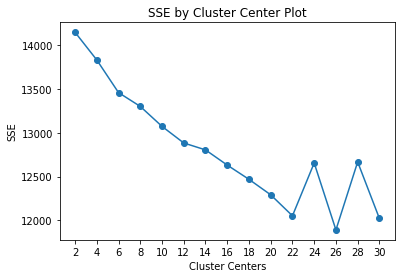

In [42]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [43]:
clusters = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

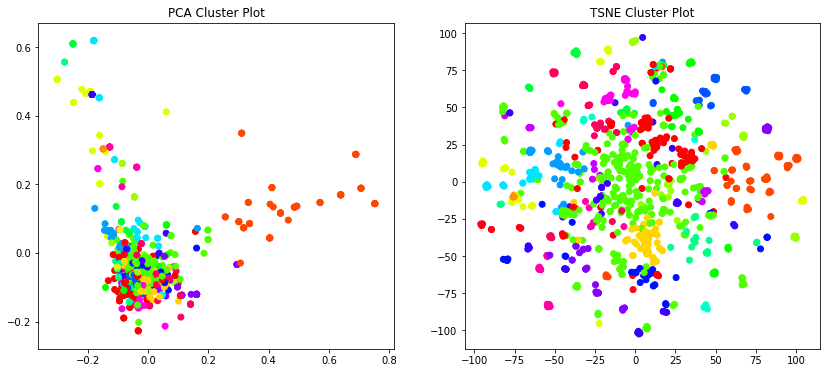

In [45]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
    
    # choose only labels associated with subset of data 
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [46]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
beach,mathematics,arizona,of,cal,diego,masters,san,california,state

Cluster 1
engineering,technology,undergrad,mathematics,masters,the,of,city,new,york

Cluster 2
england,engl,engineering,engineerin,engineeri,engineer,eng,columbia,sustainable,developm

Cluster 3
dallas,business,arlington,austin,admin,north,vermont,at,of,texas

Cluster 4
brandeis,math,princeton,phd,physics,chemistry,english,masters,harvard,columbia

Cluster 5
visual,economics,wharton,pennsylvania,columbia,johns,law,of,finance,school

Cluster 6
phd,and,biochemistry,other,accounting,queens,physics,biology,masters,of

Cluster 7
ma,baruch,california,coursework,middlebury,graduate,italian,and,cuny,spanish

Cluster 8
of,washington,comparative,and,med,biology,pre,swarthmore,columbia,history

Cluster 9
engineering,of,masters,cuny,queens,brooklyn,columbia,stanford,science,computer

Cluster 10
of,phd,coursework,music,berklee,brandeis,yeshiva,claremont,undergrad,graduate

Cluster 11
manhattan,holyoke,houston,masters,ca

In [52]:
all_edu_lists = [i for i in sample['education_list'].values]
all_edus = [item for sublist in all_edu_lists for item in sublist]
edu_counts = pd.Series(all_edus, name = 'edu_counts').value_counts()

In [54]:
edu_counts[5:20]

and            1850
California     1740
PhD            1467
Columbia       1421
New            1411
undergrad      1353
Graduate       1338
Mathematics    1282
School         1275
Engineering    1166
Coursework     1152
York           1150
Science        1143
English        1140
Physics        1101
Name: edu_counts, dtype: int64

In [57]:
edu_bigtext = listToString([i for i in sample['education_clean'].values])

In [59]:
import collections
def ngrams(text, n=2):
    return zip(*[text[i:] for i in range(n)])
ngram_counts_2 = collections.Counter(ngrams(edu_bigtext.split(), 2))
ngram_counts_2.most_common(20)

[(('University', 'of'), 5745),
 (('State', 'University'), 1728),
 (('University', 'Masters'), 1720),
 (('Columbia', 'University'), 1158),
 (('Graduate', 'Coursework'), 1152),
 (('College', 'of'), 1105),
 (('New', 'York'), 1104),
 (('Masters', 'University'), 1086),
 (('of', 'California'), 911),
 (('School', 'of'), 801),
 (('of', 'Technology'), 687),
 (('Institute', 'of'), 623),
 (('City', 'College'), 536),
 (('of', 'New'), 532),
 (('University', 'English'), 504),
 (('University', 'PhD'), 473),
 (('York', 'University'), 455),
 (('Computer', 'Science'), 450),
 (('California', 'State'), 389),
 (('of', 'Texas'), 367)]

In [60]:
def ngrams(text, n=3):
    return zip(*[text[i:] for i in range(n)])
ngram_counts_3 = collections.Counter(ngrams(edu_bigtext.split(), 3))
ngram_counts_3.most_common(20)

[(('Masters', 'University', 'of'), 1072),
 (('University', 'of', 'California'), 876),
 (('Institute', 'of', 'Technology'), 514),
 (('of', 'New', 'York'), 468),
 (('City', 'College', 'of'), 456),
 (('New', 'York', 'University'), 413),
 (('State', 'University', 'Masters'), 365),
 (('University', 'of', 'Texas'), 354),
 (('College', 'of', 'New'), 343),
 (('The', 'University', 'of'), 341),
 (('California', 'State', 'University'), 325),
 (('Graduate', 'Coursework', 'University'), 278),
 (('Coursework', 'University', 'of'), 276),
 (('of', 'California', 'Berkeley'), 267),
 (('Masters', 'Columbia', 'University'), 259),
 (('University', 'Graduate', 'Coursework'), 259),
 (('University', 'Masters', 'University'), 258),
 (('PhD', 'University', 'of'), 257),
 (('University', 'of', 'Michigan'), 253),
 (('Columbia', 'University', 'Masters'), 240)]